In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score

from textblob import TextBlob
from tqdm import tqdm

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
df_test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [5]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df_test.isnull().any()

id       False
tweet    False
dtype: bool

In [7]:
df_train.isna().any()

id       False
label    False
tweet    False
dtype: bool

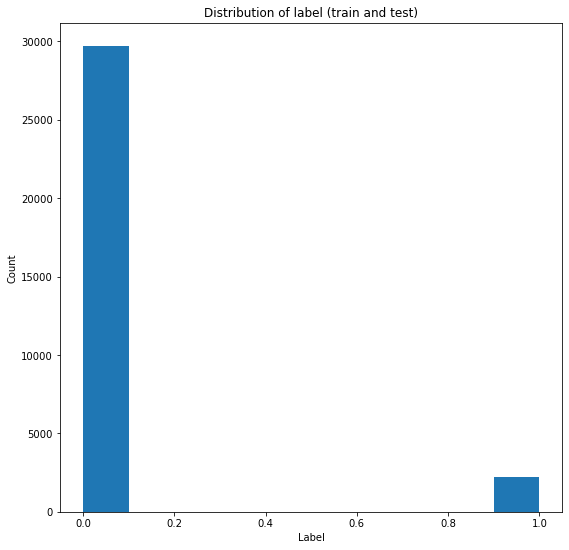

In [8]:
import seaborn as sns
plt.figure(figsize=(9,9))
plt.hist(df_train['label'],align = 'mid')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title("Distribution of label (train and test)")
plt.show()

In [9]:
n_true = len(df_train.loc[df_train['label'] == True])
n_false = len(df_train.loc[df_train['label'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 2242 (7.01%)
Number of false cases: 29720 (92.99%)


In [10]:
df_train['clean_tweet'] = df_train['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [11]:
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than 2 weeks ð ðð¼ð¹ððµ #ib...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [12]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet.isdigit()]))

In [13]:
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks ð ðð¼ð¹ððµ #ibiz...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [14]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks ð ðð¼ð¹ððµ #ibiz...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [16]:
import unidecode
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [17]:
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,#holiday bull up: you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks d dd 1/4 d1ddu #ibiza#bringito...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,"ate isz that youuu?ddddddddda$?i,"
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [18]:
df_train['clean_tweet'][7]

"the next school year is the year for exams.d- can't think about that d #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [19]:
df_train['clean_tweet'] = df_train['clean_tweet'].str.replace('[^\w\s]','')

In [20]:
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull up you will dominate your bull an...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than weeks d dd 14 d1ddu ibizabringitonma...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in ...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...
31961,31962,0,thank you @user for you follow,thank you for you follow


In [21]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',stopwords = stopwords,max_words = max_words,max_font_size = max_font_size,random_state = 42,width=800,height=400,mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

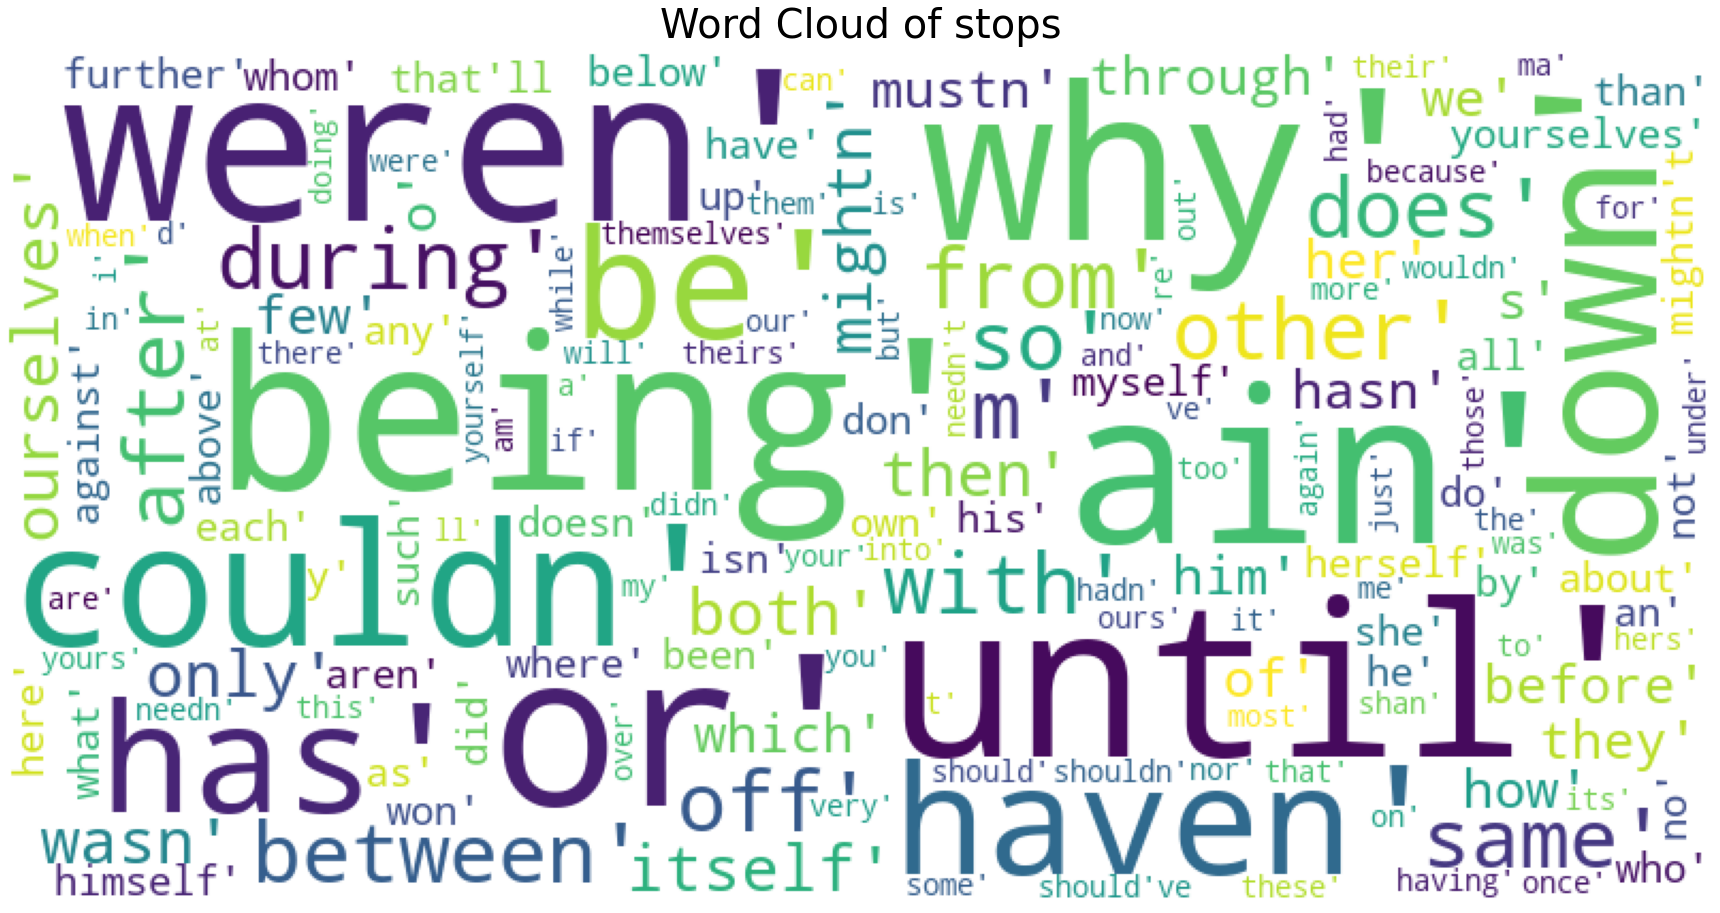

In [22]:
stops = set(stopwords.words('english'))
plot_wordcloud(stops, title="Word Cloud of stops")

In [23]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
	stops.remove(i)

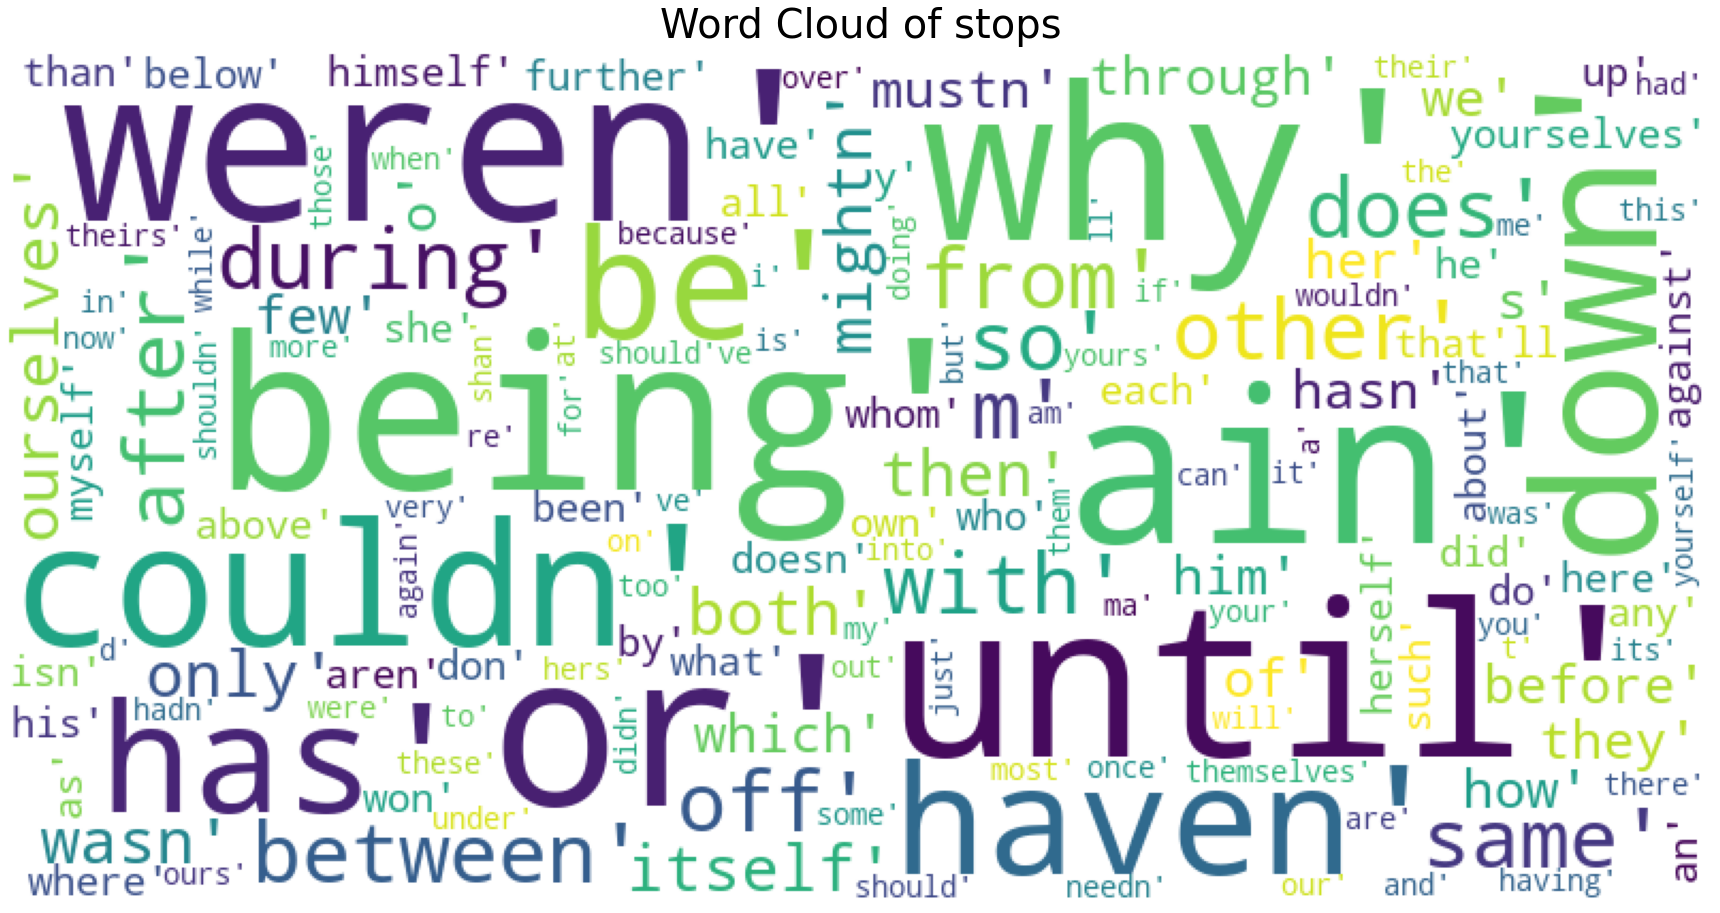

In [24]:
plot_wordcloud(stops, title="Word Cloud of stops")

In [25]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stops))
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,went far
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull dominate bull direct whatever want
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less weeks dd 14 d1ddu ibizabringitonmallorcah...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow carnt wait first time years
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act
31961,31962,0,thank you @user for you follow,thank follow


In [26]:
freq = pd.Series(' '.join(df_train['clean_tweet']).split()).value_counts()[:10]
freq

love     2647
day      2199
happy    1663
amp      1582
not      1216
u        1145
im       1139
time     1110
life     1086
like     1042
dtype: int64

In [27]:
freq = list(freq.index)

In [28]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,went far
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull dominate bull direct whatever want
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less weeks dd 14 d1ddu ibizabringitonmallorcah...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow carnt wait first years
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act
31961,31962,0,thank you @user for you follow,thank follow


In [29]:
df_train.isna().any().any()

False

In [30]:
freq = pd.Series(' '.join(df_train['clean_tweet']).split()).value_counts()[-10:]
freq

craftcreators             1
trample                   1
dom                       1
risky                     1
d1ddddd                   1
whica                     1
eastlondon                1
fresha                    1
bihdayjudygarland         1
divinginstilettosfirst    1
dtype: int64

In [31]:
freq = list(freq.index)

In [32]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train.tail(5)

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act
31961,31962,0,thank you @user for you follow,thank follow


In [33]:
df_train.isna().any()

id             False
label          False
tweet          False
clean_tweet    False
dtype: bool

In [35]:
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet.isdigit()]))
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,went far
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull dominate bull direct whatever want
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less weeks dd d1ddu ibizabringitonmallorcaholi...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow carnt wait first years
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised calgary wso condemns act
31961,31962,0,thank you @user for you follow,thank follow


In [36]:
stemmer = SnowballStemmer('english')
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,went far
31953,31954,0,good morning #instagram #shower #water #berlin...,good morn instagram shower water berlin berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull domin bull direct whatev want
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less week dd d1ddu ibizabringitonmallorcaholid...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow carnt wait first year
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh templ vandalis calgari wso condemn act
31961,31962,0,thank you @user for you follow,thank follow


In [37]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df_train.tail(10)

,id,label,tweet,clean_tweet
31952,31953,0,@user you went too far with @user,went far
31953,31954,0,good morning #instagram #shower #water #berlin...,good morn instagram shower water berlin berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull domin bull direct whatev want
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,le week dd d1ddu ibizabringitonmallorcaholiday...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow carnt wait first year
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuudddddddddai
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh templ vandalis calgari wso condemn act
31961,31962,0,thank you @user for you follow,thank follow


In [38]:
X = df_train['clean_tweet']
y = df_train['label']
X,y

(0            father dysfunct selfish drag kid dysfunct run
 1        thank lyft credit cant use caus dont offer whe...
 2                                           bihday majesti
 3                                  model take urd dddd ddd
 4                                  factsguid societi motiv
                                ...                        
 31957                             ate isz youuudddddddddai
 31958    see nina turner airwav tri wrap mantl genuin h...
 31959             listen sad song monday morn otw work sad
 31960          sikh templ vandalis calgari wso condemn act
 31961                                         thank follow
 Name: clean_tweet, Length: 31962, dtype: object,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31957    0
 31958    0
 31959    0
 31960    1
 31961    0
 Name: label, Length: 31962, dtype: int64)

In [39]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, shuffle = False)
x_train_vec = vectorizer.fit_transform(x_train)
print(x_train_vec)

  (0, 26709)	0.24164747518967455
  (0, 17511)	0.22880111775189796
  (0, 9765)	0.32545698688064234
  (0, 27451)	0.3402971663928272
  (0, 10107)	0.795278393069057
  (0, 11426)	0.18725493852772523
  (1, 13093)	0.35088592400062596
  (1, 9234)	0.36487759219244964
  (1, 23711)	0.340958677433684
  (1, 32619)	0.3170397626749184
  (1, 33681)	0.35088592400062596
  (1, 22691)	0.2615017624973246
  (1, 9588)	0.16708905602444016
  (1, 5953)	0.2339039910154412
  (1, 32513)	0.19314195869269604
  (1, 7571)	0.29312084791615284
  (1, 19308)	0.32696700924186034
  (1, 30612)	0.1507029339110524
  (2, 19481)	0.8825461477983753
  (2, 4149)	0.47022579364199946
  (3, 8464)	0.4485494666006339
  (3, 8489)	0.49698510958320335
  (3, 32474)	0.5334984065593927
  (3, 20640)	0.5169029184125847
  (4, 20924)	0.44827252133455364
  :	:
  (28759, 25252)	0.36136885606572683
  (28760, 13837)	0.4459106949542384
  (28760, 15453)	0.4459106949542384
  (28760, 13030)	0.4459106949542384
  (28760, 16942)	0.3703499181836323
  (28760,

In [40]:
x_test_vec = vectorizer.transform(x_test)
nb = MultinomialNB()
nb.fit(x_train_vec, y_train)

MultinomialNB()

In [41]:
nb.score(x_test_vec, y_test)

0.9377541445104786

In [42]:
prediction = nb.predict(x_test_vec)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
print('Precision : ', precision_score(y_test, prediction, average = 'macro'))
print('Recall : ', recall_score(y_test, prediction, average = 'macro'))
print('F1 : ', f1_score(y_test, prediction, average = 'macro'))

Precision :  0.9685921717171717
Recall :  0.5635964912280702
F1 :  0.5966273334732429


In [68]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=22)
rfc.fit(x_train_vec, y_train)
prediction_rfc = rfc.predict(x_test_vec)

In [69]:
rfc.score(x_test_vec, y_test)

0.9436972161401314

In [70]:
print('Precision : ', precision_score(y_test, prediction_rfc, average = 'macro'))
print('Recall : ', recall_score(y_test, prediction_rfc, average = 'macro'))
print('F1 : ', f1_score(y_test, prediction_rfc, average = 'macro'))

Precision :  0.9615602160788053
Recall :  0.6072877334798769
F1 :  0.6615434924787442


In [83]:
adc = AdaBoostClassifier(n_estimators=1500, learning_rate = 0.1, random_state = 22)
adc.fit(x_train_vec, y_train)
prediction_adc = adc.predict(x_test_vec)

In [84]:
adc.score(x_test_vec, y_test)

0.9530810134501094

In [85]:
print('Precision : ', precision_score(y_test, prediction_adc, average = 'macro'))
print('Recall : ', recall_score(y_test, prediction_adc, average = 'macro'))
print('F1 : ', f1_score(y_test, prediction_adc, average = 'macro'))

Precision :  0.9087038236034675
Recall :  0.7014212653560475
F1 :  0.7644053907465924
